In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2
         duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1.000000    1.000000    0.000000
25%     11.000000    1.000000    3.000000    8.000000    0.000000
50%     13.000000    2.000000    6.000000   20.000000    0.000000
75%    108.000000    2.000000   10.000000   36.000000    2.000000
max    898.000000    9.000000   63.000000  378.000000    2.000000
clase
0    86
1    40
2    44
dtype: int64


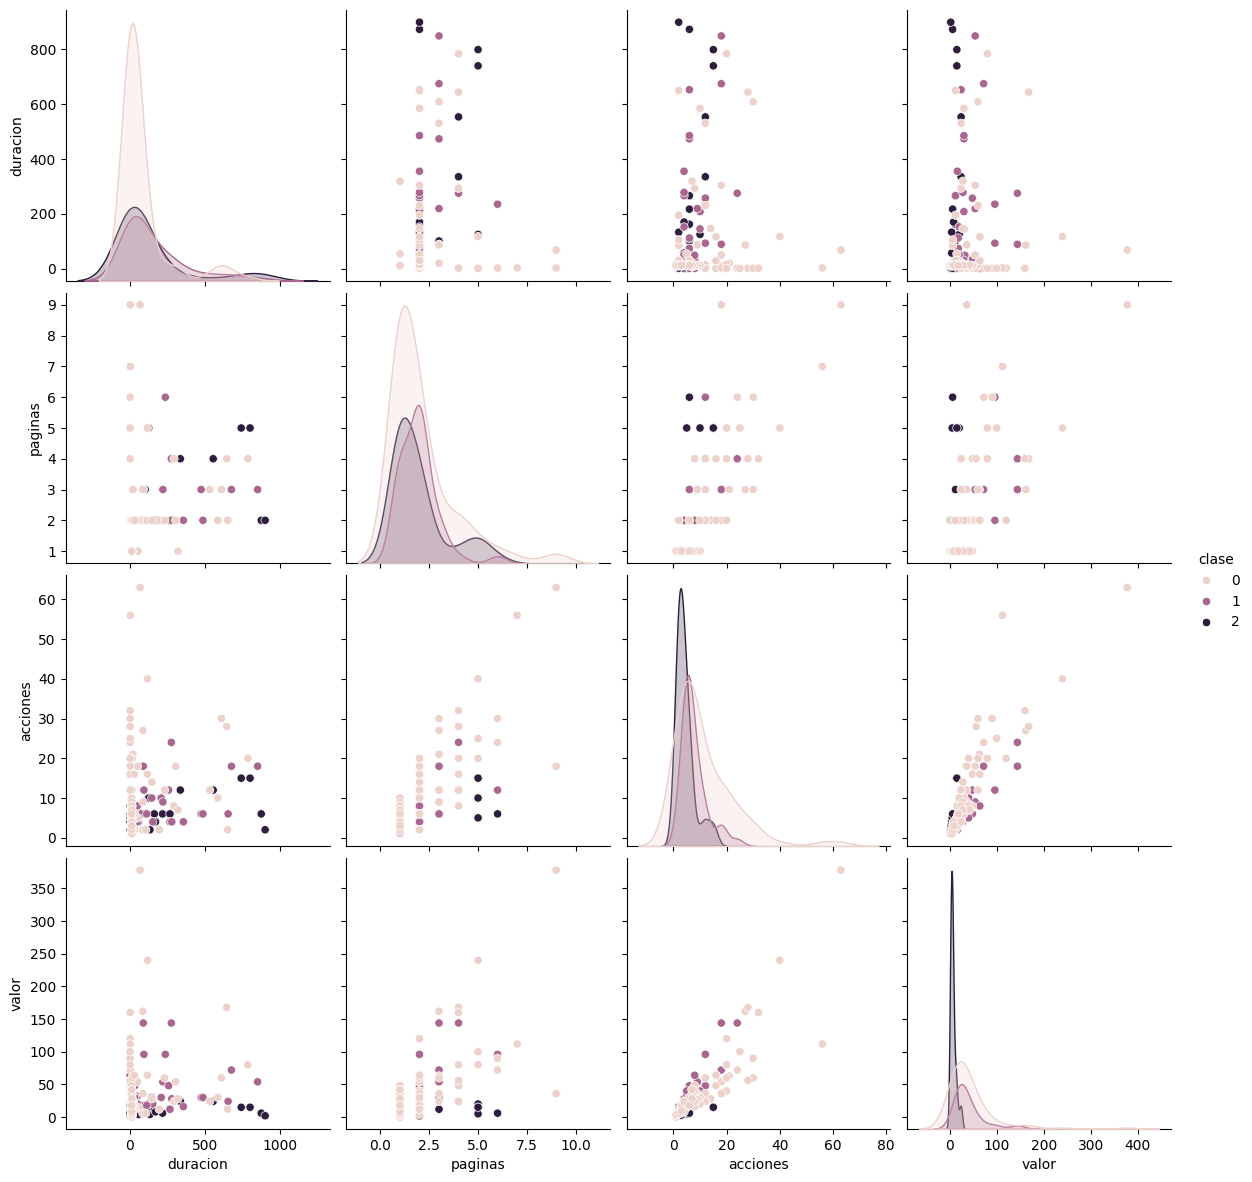

Precisión del modelo: 0.8529411764705882
Matriz de Confusión:
 [[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34

Predicción para el nuevo usuario: [2]


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model, model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar los datos desde un archivo CSV
dataframe = pd.read_csv("usuarios_win_mac_lin.csv")

# Ver primeras filas
print(dataframe.head())

# Mostrar estadísticas básicas
print(dataframe.describe())

# Ver la distribución de clases (cantidad de usuarios por sistema operativo)
print(dataframe.groupby('clase').size())

# Visualización de datos
sb.pairplot(dataframe, hue='clase', vars=["duracion", "paginas", "acciones", "valor"], height=3)
plt.show()

# Definir variables de entrada (X) y salida (y)
X = np.array(dataframe.drop(['clase'], axis=1))
y = np.array(dataframe['clase'])

# Dividir en conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

# Crear el modelo de Regresión Logística
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


# Evaluar el modelo
predictions = model.predict(X_validation)
print("Precisión del modelo:", accuracy_score(Y_validation, predictions))
print("Matriz de Confusión:\n", confusion_matrix(Y_validation, predictions))
print("Reporte de Clasificación:\n", classification_report(Y_validation, predictions))



# Clasificación de un nuevo usuario ficticio
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
prediccion_usuario = model.predict(X_new)
print("Predicción para el nuevo usuario:", prediccion_usuario)


